# Film Genre Trends Over Time #
## by Alexander Kovalev ##

### Cinema through the ages ###
Every decade since the advent of cinema has movies that we associate with it. From The Wizard of Oz and Gone with the Wind in the 30s, to the Clint Eastwood movies of the 60s, Star Wars and The Godfather in the 70s, Back to the Future in the 80s, and so on. Surely, the 2010s will be famous for the Avengers series, among other films. 

But even though we know the most popular movies from varioius decades, do we know the most popular film genres? Did all the most famous movies of each decade all come from one genre? Which genres could charecterise each decade? When did each genre peak? Can we predict what decade a movie was made in based on its genre? These are the types of questions that we will answer in this tutorial. Rather than just look at Top 10 lists, we can use the data science pipeline to find which genres REALLY characterised each decade, and maybe even predict what the next best common will be!

### Imports ###
This cell will contain all the necessary imports for this tutorial.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Data Collection ###
The first step of the process will be to find a dataset of movies. Here I will demonstrate two methods of collecting data. Kaggle provides a .csv file of the 5000 highest grossing films, which should be more than enough for our purposes. This data originally comes from TMDb (The Movie Database). This csv file has been downloaded from Kaggle and placed in the same directory as this tutorial. You can take any csv/tsv file and turn it into a dataframe! We will also use The Number's table of top grossing films per year, which we will scrape from their website.

In [149]:
# Store the TMDb data in a dataframe
movie_data = pd.read_csv('tmdb_5000_movies.csv')
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [150]:
#Scrape the-numbers.com
get_request = requests.get('https://www.the-numbers.com/movies/#tab=year') #Gets the website
parser = BeautifulSoup(get_request.content, "html.parser") #Parses the html of the site
html_table = str(parser.find("table")) #Finds the table that we're looking for (the top grossing movie per year)
dfs = pd.read_html(html_table) #Puts the table into a list of pandas dataframes
top_movies = dfs[0] #There's only one dataframe in that list, we want that
top_movies.head()

,Year,AnnualStats,TotalMovies,AverageProductionBudget,CombinedWorldwideBox Office,No. 1 Movie
0,TBD,NaN,2108,NaN,NaN,NaN
1,2029,NaN,1,NaN,NaN,NaN
2,2028,NaN,1,NaN,NaN,NaN
3,2027,NaN,1,NaN,NaN,NaN
4,2026,NaN,1,NaN,NaN,NaN


### Tidying Data ###
Tidying data is the next step, and is important in making organised, readable datasets. 

This data in movie_data is quite out of order and has many columns that we will not need. To make it tidy, let's get rid of the unnecessary columns: homepage, keywords, original_language, production_companies, taglines, runtime, spoken_langauges, and vote_count. These columns will not be relevant to this tutorial. 

The columns are not in a very neat order, either. First, let's change the order of the columns to: title, release_date, genre, popularity, vote_average, budget, and revenue. Then, since we're looking at trends by year, let's organise these movies by year released. 

In [151]:
movie_data = movie_data.drop(["homepage", "keywords", "original_language", "original_title", "overview", "production_companies", "production_countries", "runtime", "spoken_languages", "vote_count", "tagline"], axis=1)
movie_data = movie_data[["title", "release_date", "genres", "popularity", "vote_average", "budget", "revenue"]]
movie_data = movie_data.sort_values(by=["release_date"])
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
4592,Intolerance,1916-09-04,"[{""id"": 18, ""name"": ""Drama""}]",3.232447,7.4,385907,8394751
4661,The Big Parade,1925-11-05,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",0.785744,7.0,245000,22000000
2638,Metropolis,1927-01-10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",32.351527,8.0,92620000,650422
4457,Pandora's Box,1929-01-30,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",1.824184,7.6,0,0
4594,The Broadway Melody,1929-02-08,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",0.968865,5.0,379000,4358000


Great! We've gotten rid of the unnecessary columns, rearranged the columns, and sorted the movies chronologically. There's still more to be done, though. We need our two lists to overlap, and they mostly do, but some older movies are not in the 5000 movies list. Additionally, there is not much data on movies made before the 50s. Let's delete all movies made before 1950 and start with the 50s. We will have 6 neat decades!

In [152]:
drop_these = []  #The list that will contain the indices we want to drop from the dataframe
for index, row in movie_data.iterrows():
    tup = str(row["release_date"]).split("-") #Turn the year into a tuple, using the "-" as a delimiter
    year = tup[0] #Get the year from the tuple
    if year != 'nan':
        if int(year) < 1950:
            drop_these.append(index) #If the year is before 1950, add the index to the drop list
movie_data = movie_data.drop(drop_these) #Drop the indices
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
3816,Annie Get Your Gun,1950-05-17,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",1.726175,7.3,3768785,8000000
4046,Show Boat,1951-07-13,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 10749,...",1.606314,6.9,2300000,11000000
4172,A Streetcar Named Desire,1951-09-18,"[{""id"": 18, ""name"": ""Drama""}]",14.884756,7.6,1800000,8000000
3229,Quo Vadis,1951-11-08,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",7.973109,7.0,8250000,30000000
3740,The Greatest Show on Earth,1952-01-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",8.988455,6.6,4000000,36000000


There's one more issue with the movie_data dataframe. Look at the genres column! It is quite a mess. We don't need to know TMDb's genre IDs. All we need is the genre itself. Let's make that column look nice and make it easier to get a film's genre by only listing the genres. We will make each entry a list of genres, which will be of length 1 if a film has one genre, or longer if a film has more genres. If we split the "genres" entry in each row, using the double quotation mark as a delimiter, we will see that the first genre is at position 5 of our new tuple, and the second genre, if it exsits, is at position 11, and a third genre will be at position 17. 

In [153]:
for index, row in movie_data.iterrows():
    gen = row['genres']
    tup = gen.split("\"")
    genre1 = None
    genre2 = None
    genre3 = None
    if len(tup) > 4:
        genre1 = tup[5]
    if len(tup) > 10:
        genre2 = tup[11]
    if len(tup) > 16:
        genre3 = tup[17]
    genres = []
    if genre1 != None:
        genres.append(genre1)
    if genre2 != None:
        genres.append(genre2)
    if genre3 != None:
        genres.append(genre3)
    if len(genres) > 0:
        movie_data.at[index, 'genres'] = genres
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
3816,Annie Get Your Gun,1950-05-17,"[Action, Comedy, Music]",1.726175,7.3,3768785,8000000
4046,Show Boat,1951-07-13,"[Music, Romance]",1.606314,6.9,2300000,11000000
4172,A Streetcar Named Desire,1951-09-18,[Drama],14.884756,7.6,1800000,8000000
3229,Quo Vadis,1951-11-08,"[Drama, History, Romance]",7.973109,7.0,8250000,30000000
3740,The Greatest Show on Earth,1952-01-10,"[Action, Drama, Romance]",8.988455,6.6,4000000,36000000


This is much more readable!

Now we just need to tidy the Top Movies list a bit. It has entries for years that have not happened yet, which will not be of any use to us in this tutorial. This tutorial is being made in 2020, but the TMDb movie dataframe only goes up to 2016. Let's delete all the rows after 2016, as well as the rows before 1950! For the sake of consistency, let's also sort it in chronological order.

In [154]:
# Similar to the previous code block. Make array of indices that we want to drop, fill it, then call top_movies.drop()
drop_these = []
for index, row in top_movies.iterrows():
    year = row['Year']
    if year == 'TBD' or int(year) > 2016 or int(year) < 1950:
        drop_these.append(index)
top_movies = top_movies.drop(drop_these)
top_movies = top_movies.sort_values(by=["Year"])
top_movies.head()

,Year,AnnualStats,TotalMovies,AverageProductionBudget,CombinedWorldwideBox Office,No. 1 Movie
80,1950,NaN,38,"$3,334,393","$320,384,209",Cinderella
79,1951,NaN,43,"$2,958,333","$112,684,617",Quo Vadis?
78,1952,NaN,35,"$2,423,333","$80,263,817",The Greatest Show on Earth
77,1953,NaN,47,"$2,128,000","$232,992,801",Peter Pan
76,1954,NaN,60,"$3,636,667","$235,414,856",White Christmas


One last thing for tidying: From the Top Movies list, all we really want is the year and the No. 1 Movie Column. We will not be using the others, as this data is salready contained in the Movie Data list. Let's get rid of the other columns!

In [155]:
top_movies= top_movies.drop(["AnnualStats", "TotalMovies", "AverageProductionBudget", "CombinedWorldwideBox Office"],
                            axis=1)
top_movies.head()

,Year,No. 1 Movie
80,1950,Cinderella
79,1951,Quo Vadis?
78,1952,The Greatest Show on Earth
77,1953,Peter Pan
76,1954,White Christmas


Perfect! We have finished tidying the data. We now have two dataframes: One is movie_data, which lists most major films from 1950 to 2020, their ratings, revenues, and budgets. The other dataframe is top_movies, which simply lists the highest grossing movie for each year. Now we can move on to the next step!

### Exploratory Data Analysis ###

Exploratory Data Analysis, or EDA, is the process of analyzing datasets to find out their trends and characteristics, often visually. It allows us to see how different variables are related. In our case, we want to see things like how many movies of a certain genre were made in a particular year or decade, how popular the films of each genre were, the revenue of movies of a certain genre per decade, etc. 

Let's begin by making a dictionary of dictionaries, genres_per_year, which maps the year to how many movies from the 5000 list of each genre were made that year. We will use this to make a graph afterwards.

In [156]:
genres_per_year = {} # This will be a dictionary of dictionaries, mapping a year to a dict that shows the number of films in each genre
for index, row in movie_data.iterrows():
    tup = str(row["release_date"]).split("-") # Turn the year into a tuple, using the "-" as a delimiter
    year = tup[0] # Get the year from the tuple
    genre_count = {} # Dictionary mapping the number of films made under each genre
    if year not in genres_per_year:
        genres_per_year[year] = {}
    for gen in row['genres']:
        if gen not in genres_per_year[year]:
            genres_per_year[year][gen] = 1
        else:
            genres_per_year[year][gen] += 1

We have filled the genres_per_year dictionary. Let's also make a set that lists all of the genres. This will simplify making our graphs.

In [157]:
genre_set = set()
for year in genres_per_year:
    for gen in genres_per_year[year]:
        genre_set.add(gen)
genre_set.remove("]")
genre_set.remove("[")
genre_set.remove("TV Movie") # This and "Foreign" won't tell us anything
genre_set.remove("Foreign")
print(genre_set)

{'War', 'Mystery', 'Thriller', 'Music', 'Comedy', 'History', 'Western', 'Action', 'Family', 'Romance', 'Adventure', 'Fantasy', 'Crime', 'Drama', 'Science Fiction', 'Documentary', 'Horror', 'Animation'}


Now let's make some bar graphs! We'll make a graph for each genre, showing how many films of that genre were made each year. 

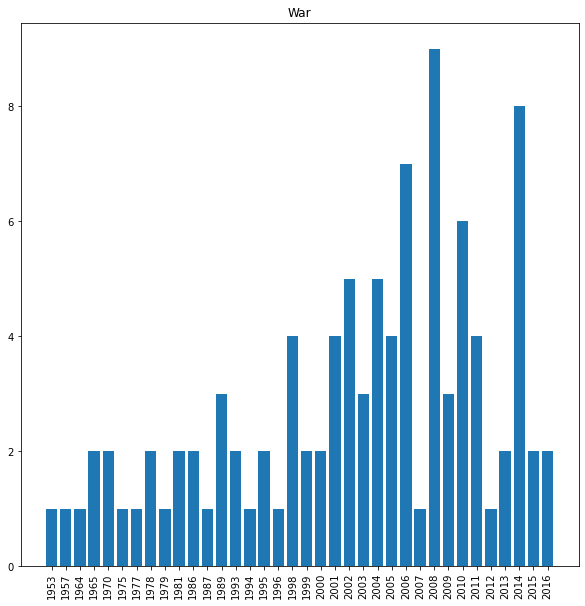

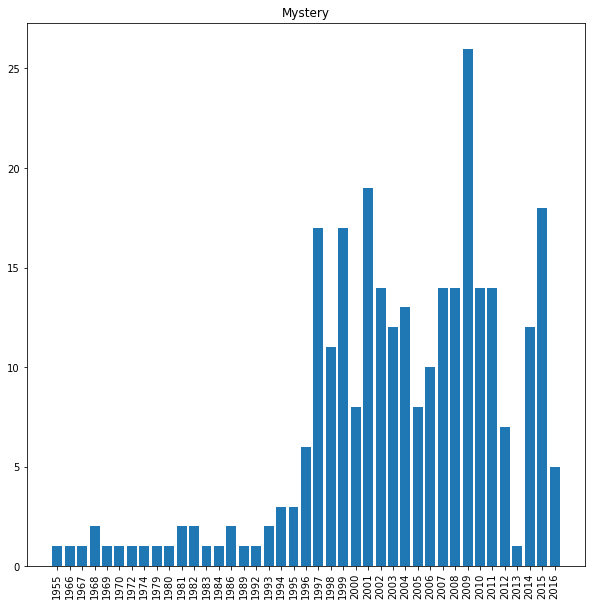

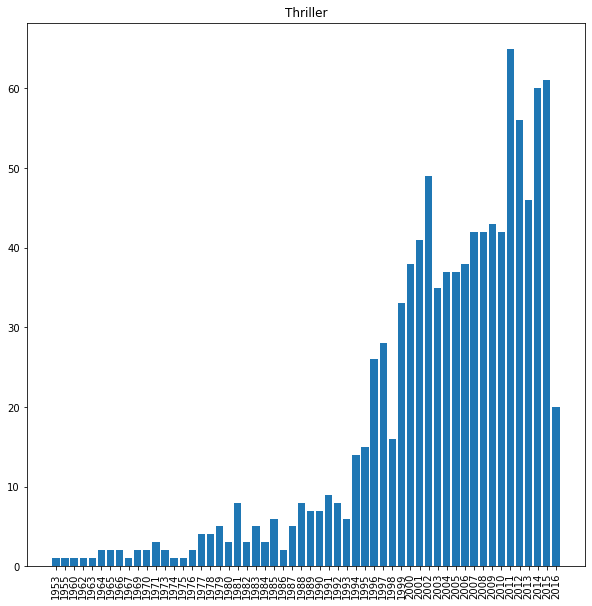

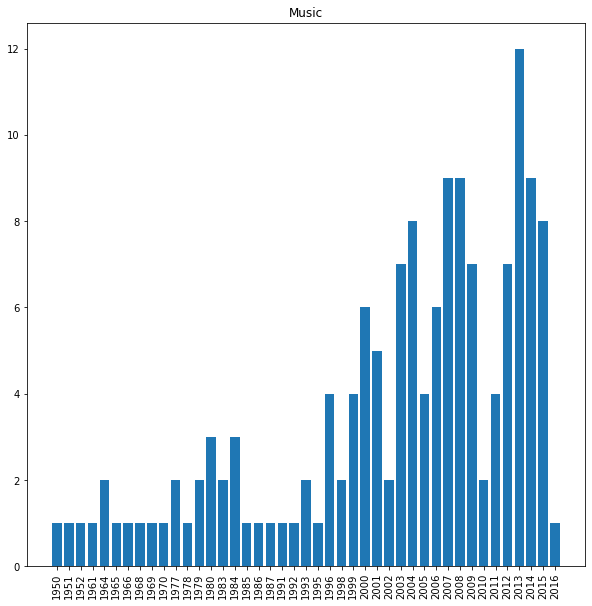

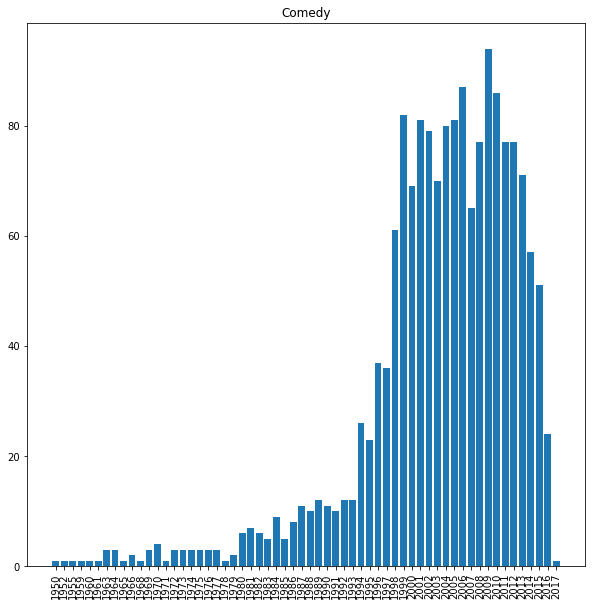

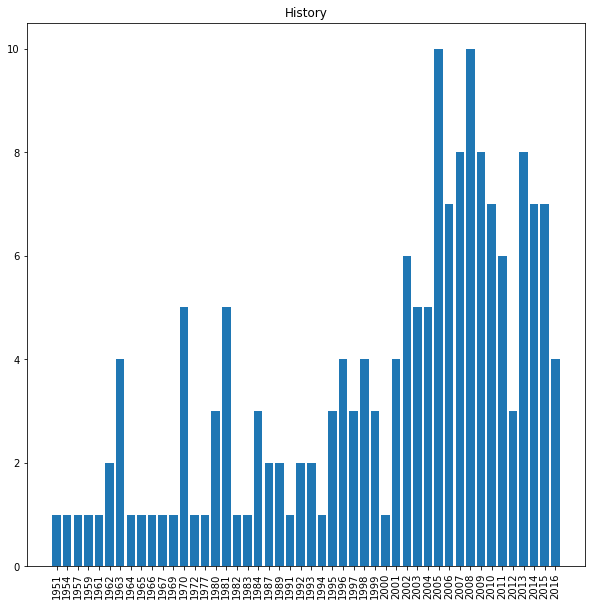

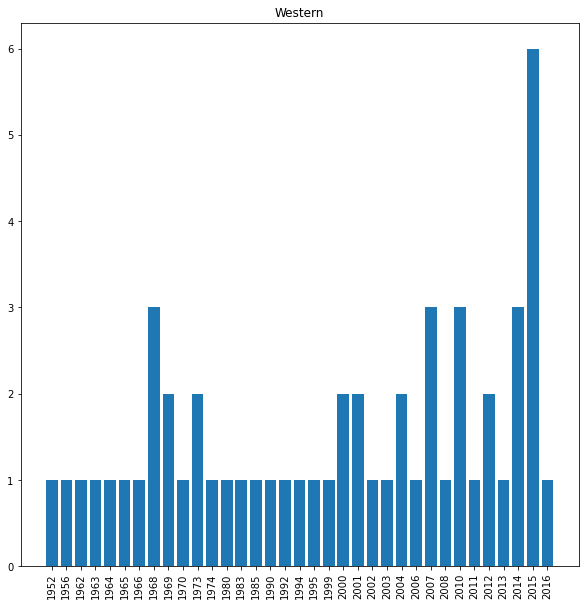

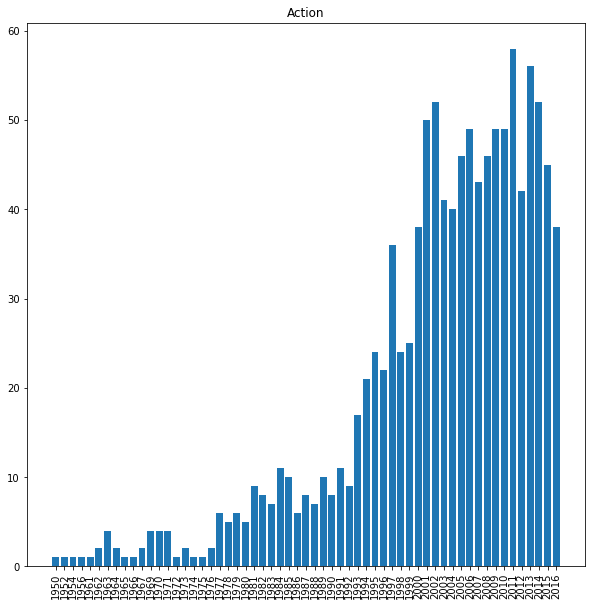

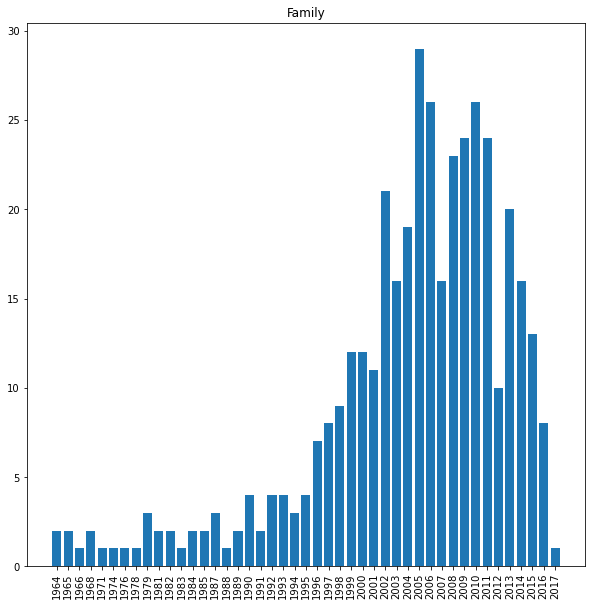

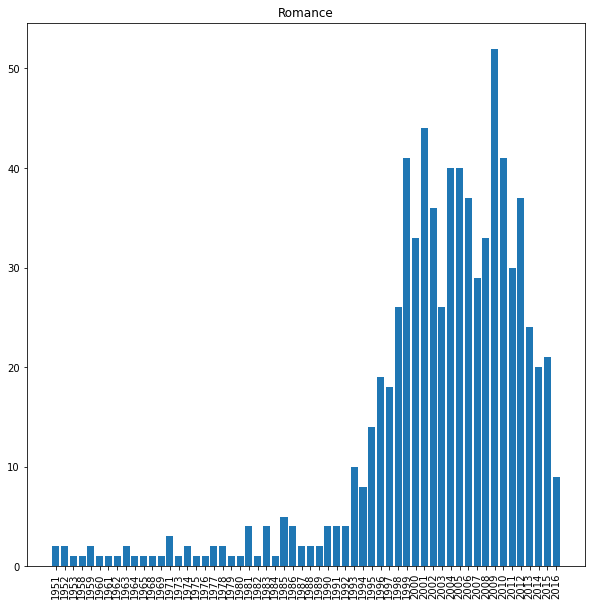

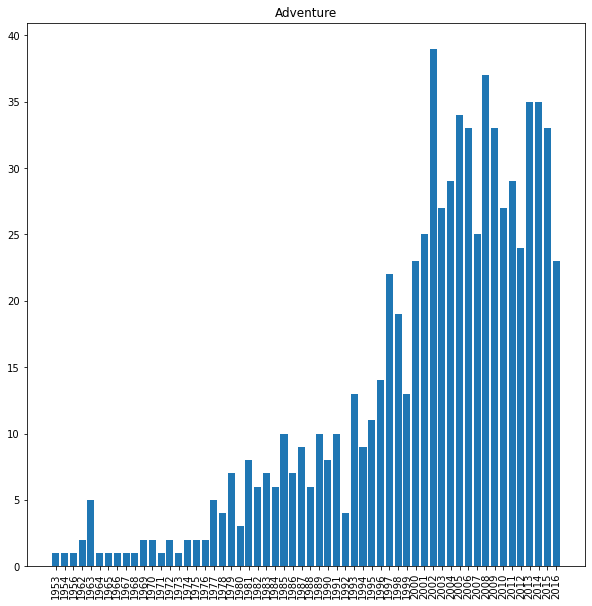

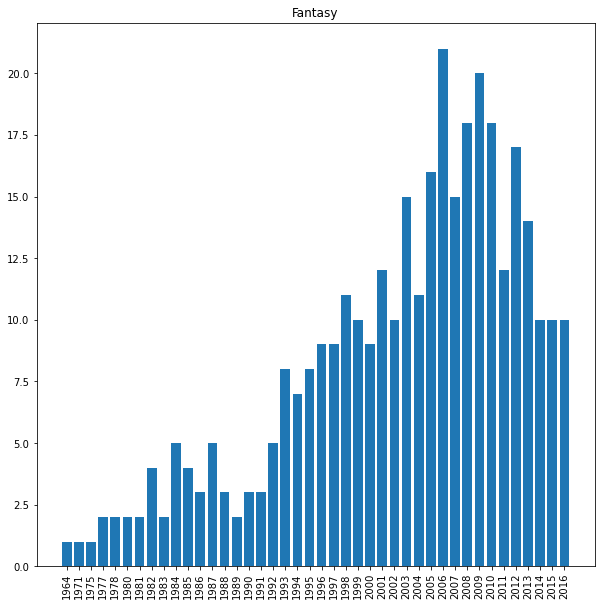

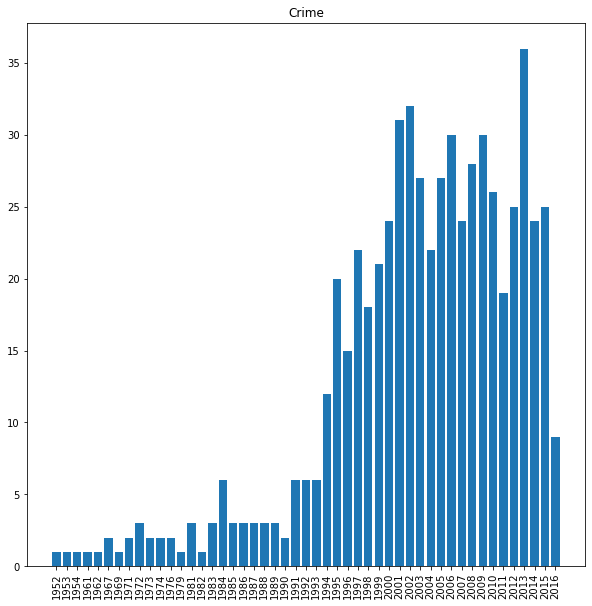

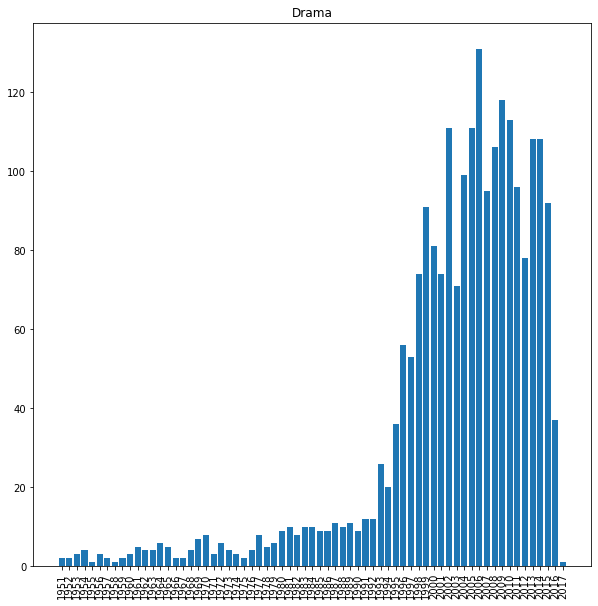

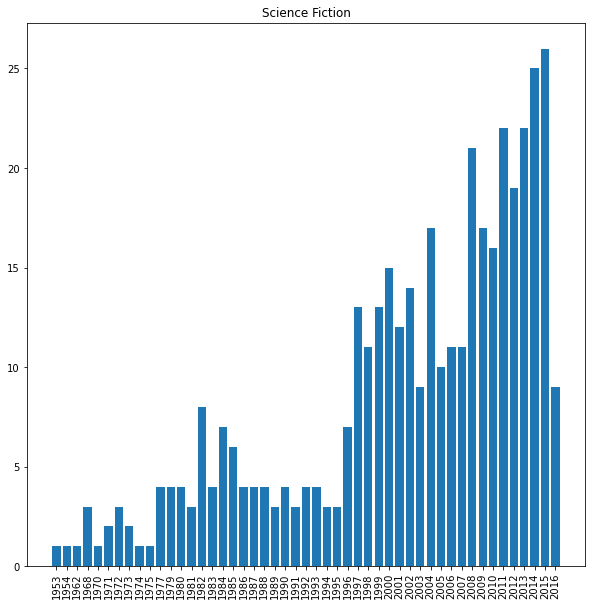

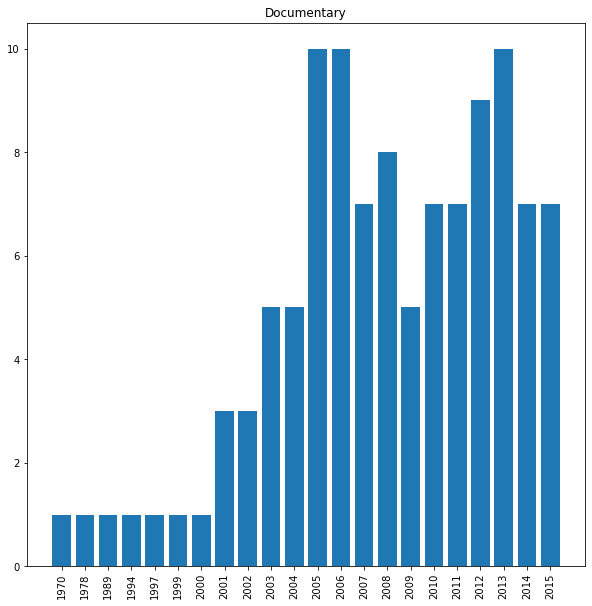

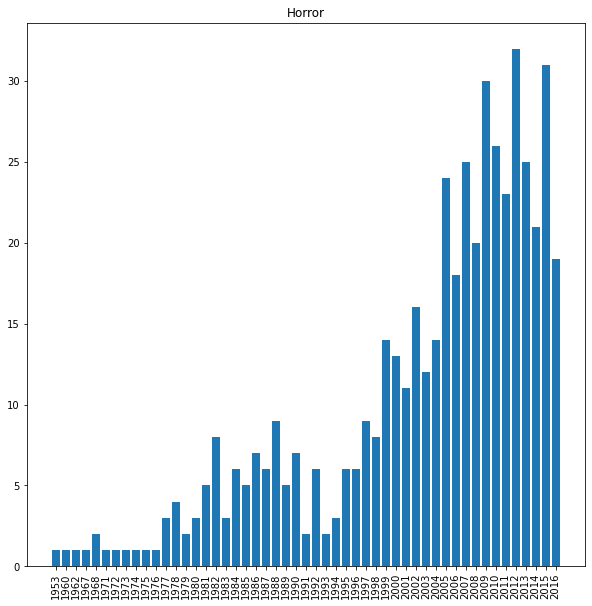

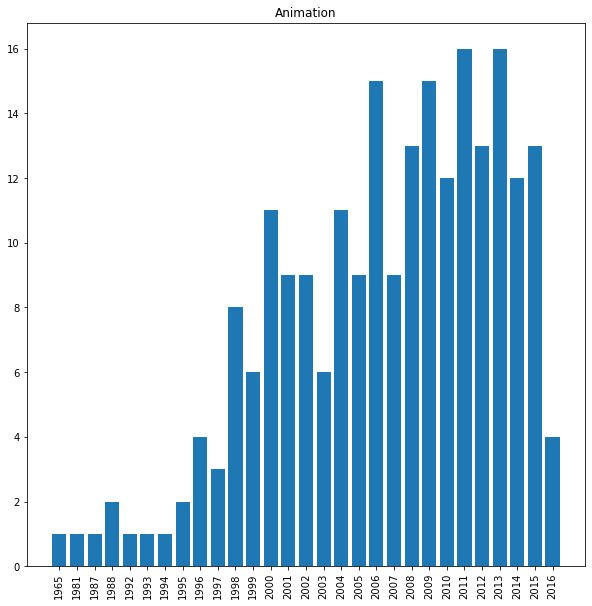

In [158]:
for gen in genre_set:
    years = []
    counts = []
    for year, stats in genres_per_year.items():
        for gen2, count in stats.items():
            if gen == gen2:
                counts.append(count)
                years.append(year)
    plt.figure(figsize=(10, 10))
    plt.bar(years, counts)
    plt.title(gen)
    plt.xticks(rotation=90)
    plt.show()